# Python Project

**Hotel**

The program must present and display a report of the result obtained, showing for
each strategy the number of customers accommodated, the number of rooms occupied, the
number of different hotels occupied, the total volume of business (total earnings of each
hotel), and the degree of customer satisfaction (calculated according to the location of the
hotel assigned to them with respect to their preferences).
I will use 4 differents strategies:
**1-random**
**2-customer preference**
**3-price**
**4-availability**

**Random:**
customers are randomly distributed to the rooms until the seats or customers
are exhausted.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing useful library for python

from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
#I'm taking all the excel file that i need to manipulate and use for obtain the final result
hotel_ex['stanze_disponibili'] = hotel_ex['rooms'].copy()
#creating a colunm that rapresent the room available
guadagni_hotel={hotel: 0 for hotel in hotel_ex['hotel']}
##dictionary for the earnings of each hotel
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
#creating the variables needed and the set for hotel that are occupied and a list for allocations 
for _, guest_row in guest_ex.iterrows():
    #we are iterating on every row of guest escluding the first that are the index
    
    guest=guest_row['guest']
    discount=guest_row['discount']
    #ww are taking from each row the value of the colunm in square brakets and we are assigning to a variable
    
    preferenze_ospite=preferences_ex[preferences_ex['guest']== guest]
    #filtering 'preferenze' in order to associate to a guest only his preferences 
    
    hotels_preferiti=preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    #filtring for hotel that has at least 1 room available and control that this hotel is in the preferences of the guest
    
    if not hotels_preferiti.empty:
        hotel_selezionato= np.random.choice(hotels_preferiti['hotel'])
        ospiti_soddisfatti += 1
    else:
        hotels_disponibili=hotel_ex[hotel_ex['stanze_disponibili']>0]
        if hotels_disponibili.empty:
            print('Non ci sono hotel disponibili')
            continue 
        hotel_selezionato= np.random.choice(hotels_disponibili['hotel'])
    #this loop assign to the guest a random hotel in his preferences if it is possible, in other case it gives one random that is free, if that is not possible he won't have the room
    
    prezzo_hotel= hotel_ex[hotel_ex['hotel']==hotel_selezionato].iloc[0]
    price=prezzo_hotel['price']
    #i take the row of the hotel that is selected and than asssign to price the value of the colunm price in the row of the hotel chosen
    
    prezzo_finale= price*(1-discount)
    #calculete the discount on the final price 
    
    allocazioni.append({
        'cliente':guest,
        'hotel_f': hotel_selezionato,
        'prezzo_pagato': prezzo_finale
    })
    #in this way i've all the informations, that i need, matched 
    
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    hotel_ex.loc[indice_hotel, 'stanze_disponibili'] -= 1
    #i'm associating to each hotel selected his index
    #thanks to .loc i'm searching by using 'indice_hotel' and reducing by 1 'stanze_disponibili' when we assign one
    
    ospiti_allocati += 1
    stanze_occupate += 1
    hotel_occupati.add(hotel_selezionato)
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    #updating after allocate a guest    
allocazioni_df= pd.DataFrame(allocazioni)  
#creating the dataframe for allocations
numero_hotel_occupati= len(hotel_occupati)
print(f'Numero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Ospiti soddisfatti: {ospiti_soddisfatti}')
#printing the result that i was searching for
guadagni_df= pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno Totale'])
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df)

Numero di ospiti che hanno ottenuto una camera: 4000
Numero di stanze occupate: 4000
Numero di hotel occupati: 400
Ospiti soddisfatti: 3980

Guadagni totali di ogni hotel:
         Hotel  Guadagno Totale
0      hotel_1          3300.57
1      hotel_2           750.72
2      hotel_3          1512.93
3      hotel_4          2260.80
4      hotel_5          1880.38
..         ...              ...
395  hotel_396           973.08
396  hotel_397           537.88
397  hotel_398          1298.46
398  hotel_399          2076.04
399  hotel_400          1432.60

[400 rows x 2 columns]


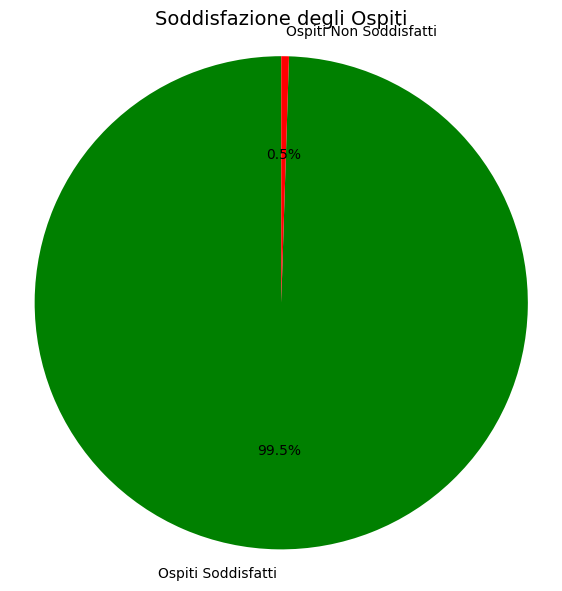

In [3]:
labels = ['Ospiti Soddisfatti', 'Ospiti Non Soddisfatti']
sizes = [ospiti_soddisfatti, ospiti_allocati-ospiti_soddisfatti]
colors = ['green', 'red']
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Soddisfazione degli Ospiti', fontsize=14)
plt.axis('equal')  
plt.show()
# creating a plot that shows how many guest were satisfied accordin to their preferences
#.figure create the figure considering the size that i choose
#.axis to have the circle
#.title the title of the graph
#.show just show the image
